In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('vehicles.csv')
df=data.copy()

In [30]:
df.head()

,id,url,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,drive,size,type,paint_color,description,county,state,posting_date,Age
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,NaN,al,2021-05-04T12:31:25-0500,3.0
49,7314811916,https://auburn.craigslist.org/ctd/d/auburn-uni...,32990,jeep,wrangler sport suv 2d,good,NaN,gas,20581.0,clean,other,4wd,NaN,SUV,silver,Carvana is the safer way to buy a car During t...,NaN,al,2021-04-30T10:11:01-0500,3.0
50,7314811909,https://auburn.craigslist.org/ctd/d/auburn-uni...,38990,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,NaN,NaN,pickup,NaN,Carvana is the safer way to buy a car During t...,NaN,al,2021-04-30T10:11:00-0500,3.0
52,7314584315,https://auburn.craigslist.org/ctd/d/auburn-uni...,31590,mazda,mx-5 miata club,good,NaN,gas,2195.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,NaN,al,2021-04-29T18:11:10-0500,3.0
53,7314584322,https://auburn.craigslist.org/ctd/d/auburn-uni...,27990,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,NaN,al,2021-04-29T18:11:11-0500,3.0


In [7]:
df.shape

(426880, 26)

In [8]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [32]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum()

id                  0
url                 0
price               0
manufacturer     3463
model             819
condition       11706
cylinders       16195
fuel              313
mileage            83
title_status      832
transmission       80
drive           11916
size            27218
type             7694
paint_color     10351
description         1
county          34864
state               0
posting_date        0
Age              1115
dtype: int64

In [34]:
df.describe()

,id,price,mileage,county,Age
count,3.486400e+04,34864.000000,3.478100e+04,0.0,33749.000000
mean,7.310854e+09,27458.864846,6.226484e+04,NaN,20.402827
std,4.774269e+06,21312.997280,4.673133e+05,NaN,25.041668
min,7.301584e+09,0.000000,0.000000e+00,NaN,1.000000
25%,7.306788e+09,9300.000000,4.148000e+03,NaN,3.000000
50%,7.311835e+09,26630.000000,1.367300e+04,NaN,3.000000
75%,7.315164e+09,39500.000000,4.200000e+04,NaN,41.000000
max,7.317097e+09,225000.000000,1.000000e+07,NaN,123.000000


# Data Cleaning

In [10]:
#re-naming the columns
df.rename({'odometer': 'mileage'}, axis= 1,inplace= True)

In [15]:
# Lets drop the columns that are not useful for the car price prediction.
drop_columns = ['region', 'region_url','lat','long','image_url', 'VIN']
df = df.drop(drop_columns, axis =1)
df.shape

(426880, 20)

In [20]:
#lets drop the columns where price of the car is more than 2.5 million dollars because high end used cars like ferrari, porsche costs less than that
df.drop(df[df.price > 250000].index,inplace=True)
df.shape

(426785, 20)

In [23]:
#Lets drop the columns where year is less than 1990 and greater than 2019
ind = df[(df['year'] > 1990) & (df['year'] < 2020)].index
df.drop(ind,inplace=True)
df.shape

(35981, 20)

In [24]:
#finding the age of car
from datetime import datetime

current_year = datetime.now().year
df['Age'] = current_year - df['year']
del df['year']

In [42]:
df.sample(5)

,id,url,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,drive,size,type,paint_color,county,state,posting_date,Age,word_len
337120,7310895168,https://pittsburgh.craigslist.org/cto/d/vienna...,13500,ford,NaN,like new,4 cylinders,gas,1200000.0,clean,manual,NaN,NaN,other,yellow,NaN,pa,2021-04-22T12:35:25-0400,94.0,370
5476,7314901135,https://anchorage.craigslist.org/ctd/d/anchora...,21384,chevrolet,trax,NaN,4 cylinders,gas,3671.0,clean,automatic,4wd,NaN,SUV,grey,NaN,ak,2021-04-30T09:36:48-0800,3.0,5653
290319,7311992957,https://cincinnati.craigslist.org/ctd/d/coving...,35990,dodge,challenger r/t coupe 2d,good,8 cylinders,gas,1548.0,clean,other,rwd,NaN,coupe,black,NaN,oh,2021-04-24T14:41:20-0400,3.0,6125
53760,7315560556,https://sacramento.craigslist.org/ctd/d/sacram...,46999,jeep,gladiator,NaN,NaN,gas,3465.0,clean,automatic,4wd,NaN,pickup,white,NaN,ca,2021-05-01T16:10:19-0700,3.0,1885
238963,7310506062,https://hickory.craigslist.org/cto/d/lenoir-19...,13500,chevrolet,malibu,excellent,8 cylinders,gas,105000.0,clean,automatic,rwd,NaN,NaN,NaN,NaN,nc,2021-04-21T15:45:27-0400,45.0,507


In [28]:
# Lets drop the rows where has atleast 3 NaN values.
df.dropna(thresh = 13, axis = 0, inplace = True)
df.shape

(34864, 20)

In [29]:
#dropping the duplicates in the data
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(34864, 20)

In [35]:
df.manufacturer.unique()

array(['chevrolet', 'jeep', 'ford', 'mazda', 'honda', 'buick', 'lexus',
       'volvo', 'infiniti', 'acura', nan, 'mitsubishi', 'gmc', 'jaguar',
       'audi', 'toyota', 'mercedes-benz', 'nissan', 'dodge', 'pontiac',
       'lincoln', 'alfa-romeo', 'hyundai', 'mercury', 'ram', 'cadillac',
       'kia', 'bmw', 'rover', 'chrysler', 'porsche', 'subaru',
       'volkswagen', 'fiat', 'datsun', 'mini', 'harley-davidson', 'tesla',
       'land rover', 'ferrari', 'morgan'], dtype=object)

In [39]:
df.dropna(subset = ['description'],inplace = True) # dropping the null values in 'desc' column
df['word_len'] = df.description.apply(lambda x: len(str(x.lower().split())))
del df['description']

In [44]:
# removing the 'cylinders' in the columns and converting into float.
df.cylinders = df.cylinders.apply(lambda x: x if str(x).lower()[-1] == 'o' or str(x).lower()[-1] == 'n' else str(x).lower().replace('cylinders', ''))
df.cylinders = pd.to_numeric(df.cylinders, errors = 'coerce')
df.cylinders.fillna(df.cylinders.median(), inplace = True)

In [45]:
# Lets drop the rows where has atleast 3 NaN values.
df.dropna(thresh = 13, axis = 0, inplace = True)
df.shape

(34863, 20)

In [46]:
# fixing the spelling errors
df.manufacturer = df.manufacturer.replace('porche', 'porsche')

In [86]:
# creating new dataframe to find the size of each car in order to fill the null values in the size feature of same car
df = df.sort_values(by= ['size','manufacturer','type'])
df.drop_duplicates(subset = ['model','type'], keep = 'first', inplace = True)


In [87]:
df.isnull().sum() 

id                 0
url                0
price              0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
mileage            0
title_status       0
transmission       0
drive              0
size               0
type               0
paint_color        0
county          2028
state              0
posting_date       0
Age                0
word_len           0
age                0
dtype: int64

In [82]:
# # dictionary that contain size of each car
# size = dict(zip(new['model'], new['size']))
# for i in range(len(df)):
#     if str(df['size'][i]).lower()[0] == 'n' and (df['model'][i] in size.keys()):
#         df['size'][i] = size[df['model'][i]]

In [88]:
# Adding the manufacturers name to list from the dataset and adding few more manufacturer after looking the make column in dataset
manuf = []
for i in df.manufacturer.value_counts().index:
    manuf.append(i)
manuf.append('Tesla')
manuf.append('Rolls-Royce')
manuf.append('genesis')

In [89]:
#dropping the null values
df.dropna(subset = ['transmission','type','manufacturer','model','fuel','mileage','title_status','paint_color','drive','size','condition'],inplace = True)
df.index = range(len(df))
df.shape

(2028, 21)

In [77]:
df.condition.value_counts()

excellent    1650
good         1597
like new      784
fair          470
new           191
salvage        23
Name: condition, dtype: int64

In [79]:
df.title_status.value_counts()

clean         4436
missing         93
rebuilt         86
lien            52
salvage         36
parts only      12
Name: title_status, dtype: int64

In [90]:
# Finding the models of car which has fewer data
other_models = df.model.value_counts().index[df.model.value_counts().values < 5]

In [91]:
# changing the datatype from float to int
df['age'] = df['Age'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['cylinders'] = df['cylinders'].astype(int)

In [94]:
df.sample(5)

,id,url,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,...,drive,size,type,paint_color,county,state,posting_date,Age,word_len,age
1533,7302409970,https://pueblo.craigslist.org/cto/d/pueblo-972...,6000,toyota,landcruiser,good,8,gas,420690,clean,...,4wd,full-size,SUV,black,NaN,co,2021-04-05T19:15:36-0600,51.0,64,51
911,7305081289,https://batonrouge.craigslist.org/cto/d/glynn-...,27500,ford,model a coupe,good,4,gas,46723,missing,...,rwd,full-size,coupe,purple,NaN,la,2021-04-11T07:03:46-0500,93.0,5418,93
937,7313645667,https://orlando.craigslist.org/ctd/d/tangerine...,55500,ford,model a,new,8,gas,100,clean,...,rwd,full-size,other,green,NaN,fl,2021-04-27T21:03:20-0400,93.0,702,93
1588,7303250495,https://santafe.craigslist.org/cto/d/los-alamo...,1000,volvo,240 dl,fair,4,gas,258000,clean,...,rwd,full-size,sedan,silver,NaN,nm,2021-04-07T12:32:23-0600,34.0,38,34
1715,7314772530,https://charlotte.craigslist.org/cto/d/charlot...,16500,fiat,campagnola,good,4,gas,14000,clean,...,4wd,mid-size,SUV,white,NaN,nc,2021-04-30T09:58:28-0400,43.0,3453,43


In [95]:
df.describe(include= 'all')

,id,url,price,manufacturer,model,condition,cylinders,fuel,mileage,title_status,...,drive,size,type,paint_color,county,state,posting_date,Age,word_len,age
count,2.028000e+03,2028,2028.000000,2028,2028,2028,2028.000000,2028,2.028000e+03,2028,...,2028,2028,2028,2028,0.0,2028,2028,2028.000000,2028.000000,2028.000000
unique,NaN,2028,NaN,39,1601,6,NaN,5,NaN,6,...,3,4,13,12,NaN,51,2028,NaN,NaN,NaN
top,NaN,https://spacecoast.craigslist.org/ctd/d/orland...,NaN,chevrolet,beetle,good,NaN,gas,NaN,clean,...,rwd,full-size,coupe,white,NaN,ca,2021-05-03T12:19:29-0400,NaN,NaN,NaN
freq,NaN,1,NaN,436,6,713,NaN,1898,NaN,1871,...,1205,1236,353,403,NaN,306,1,NaN,NaN,NaN
mean,7.311923e+09,NaN,19415.966963,NaN,NaN,NaN,6.553748,NaN,1.421859e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.317554,1334.669625,38.317554
std,4.240881e+06,NaN,20694.700263,NaN,NaN,NaN,1.700742,NaN,8.153882e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.677570,1901.088812,24.677570
min,7.301602e+09,NaN,0.000000,NaN,NaN,NaN,3.000000,NaN,0.000000e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,19.000000,1.000000
25%,7.309037e+09,NaN,5356.250000,NaN,NaN,NaN,5.000000,NaN,1.000000e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,346.000000,3.000000
50%,7.313002e+09,NaN,12500.000000,NaN,NaN,NaN,8.000000,NaN,5.080650e+04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,704.000000,40.000000
75%,7.315591e+09,NaN,26900.000000,NaN,NaN,NaN,8.000000,NaN,1.000000e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,1480.500000,54.000000


In [96]:
df_final=df[['price','Age','manufacturer','model','condition','cylinders','fuel','mileage','title_status','transmission','drive','size','type','paint_color','word_len']]

In [98]:
df_final.sample(5)

,price,Age,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,drive,size,type,paint_color,word_len
1782,11000,41.0,gmc,bus,good,8,diesel,82000,clean,automatic,rwd,mid-size,bus,yellow,210
484,30000,72.0,chevrolet,styleline,good,8,gas,16,clean,automatic,rwd,full-size,coupe,black,1631
777,9500,96.0,chrysler,60 series,excellent,6,gas,12345,clean,manual,rwd,full-size,sedan,custom,513
1099,10,45.0,ford,f-250 xlt lariat,good,8,gas,30749,clean,manual,4wd,full-size,truck,blue,520
88,7500,43.0,fiat,spider,good,4,gas,97000,clean,manual,rwd,compact,convertible,white,2064


<AxesSubplot:xlabel='type', ylabel='count'>

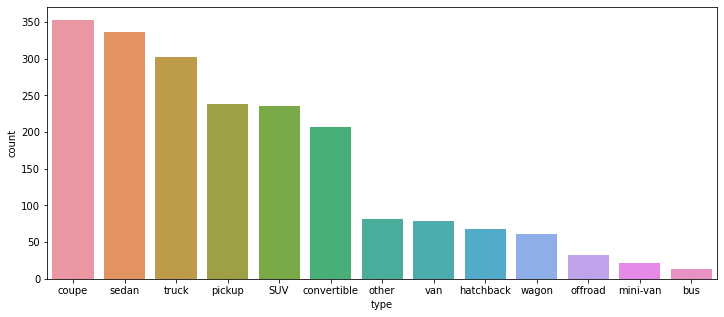

In [113]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'type', order = df_final['type'].value_counts().index, data = df_final)

<AxesSubplot:xlabel='paint_color', ylabel='count'>

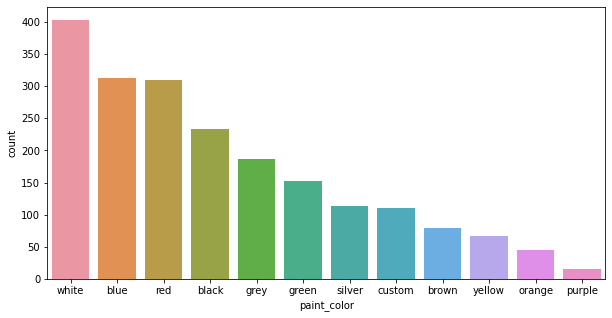

In [115]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'paint_color', order = df_final['paint_color'].value_counts().index,data = df_final)

1.We can see that people are buying used cars with common colors(white,grey,black,silver,blue,red) than not common colors
2.Not Common colors (purple, orange, green etc) are mostly luxury cars which are too expensive 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'ford'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'dodge'),
  Text(4, 0, 'mercedes-benz'),
  Text(5, 0, 'jeep'),
  Text(6, 0, 'gmc'),
  Text(7, 0, 'volkswagen'),
  Text(8, 0, 'pontiac'),
  Text(9, 0, 'nissan'),
  Text(10, 0, 'buick'),
  Text(11, 0, 'cadillac'),
  Text(12, 0, 'chrysler'),
  Text(13, 0, 'ram'),
  Text(14, 0, 'honda'),
  Text(15, 0, 'mercury'),
  Text(16, 0, 'lincoln'),
  Text(17, 0, 'bmw'),
  Text(18, 0, 'kia'),
  Text(19, 0, 'porsche'),
  Text(20, 0, 'mazda'),
  Text(21, 0, 'subaru'),
  Text(22, 0, 'volvo'),
  Text(23, 0, 'jaguar'),
  Text(24, 0, 'hyundai'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'rover'),
  Text(27, 0, 'fiat'),
  Text(28, 0, 'mini'),
  Text(29, 0, 'datsun'),
  Text(30, 0, 'lexus'),
  Text(31, 0, 'alfa-romeo'),
  Text(32, 0, 'acura'),


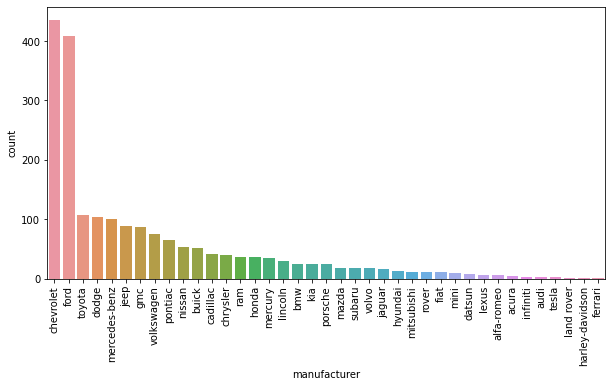

In [117]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'manufacturer', order = df_final['manufacturer'].value_counts().index, data = df_final)
plt.xticks(rotation = 90)

### Ford, Toyota, Chevrolet and Honda manufacturer cover most of the used cars because they are cheap and good than other manufacturers like Ferrari, Rolls-Royce and Hennessey

<AxesSubplot:xlabel='Age', ylabel='count'>

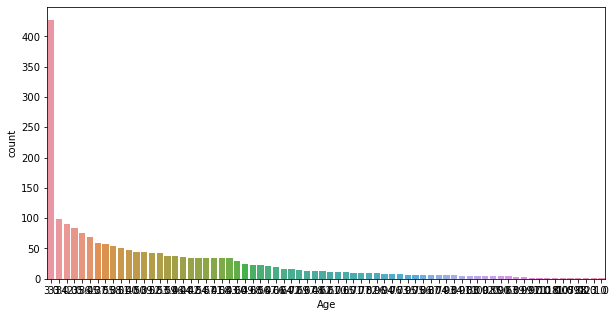

In [121]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Age', order = df_final['Age'].value_counts().index, data = df_final)

<AxesSubplot:xlabel='mileage', ylabel='Density'>

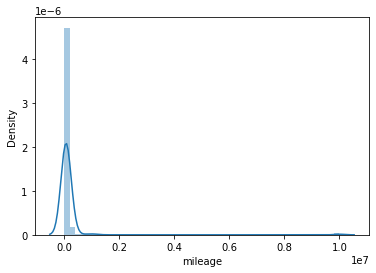

In [127]:
sns.distplot(df_final['mileage'])

<AxesSubplot:xlabel='word_len', ylabel='Density'>

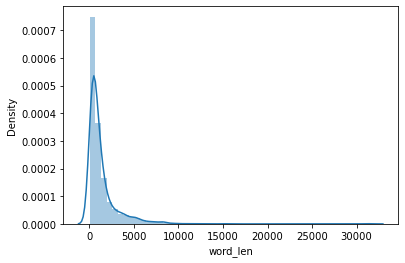

In [128]:
sns.distplot(df_final['word_len'])

<AxesSubplot:>

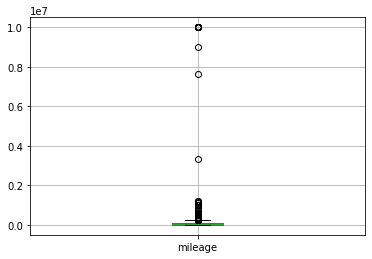

In [130]:
df_final.boxplot('mileage')

<AxesSubplot:>

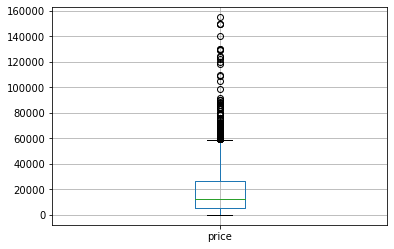

In [131]:
df_final.boxplot('price')

<AxesSubplot:>

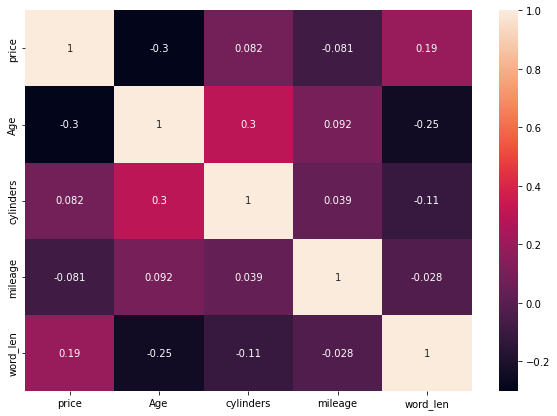

In [132]:
plt.figure(figsize = (10,7))
corr = df_final.corr()
sns.heatmap(corr, annot = True)

# Model Building

In [99]:
df_final.fuel.unique()

array(['gas', 'electric', 'other', 'diesel', 'hybrid'], dtype=object)

In [100]:
df_final.title_status.unique()

array(['clean', 'rebuilt', 'missing', 'salvage', 'lien', 'parts only'],
      dtype=object)

In [101]:
df_final.transmission.unique()

array(['other', 'manual', 'automatic'], dtype=object)

In [104]:
df_final.drive.unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [107]:
df_final.type.unique()

array(['sedan', 'convertible', 'coupe', 'SUV', 'hatchback', 'other',
       'pickup', 'truck', 'wagon', 'van', 'offroad', 'mini-van', 'bus'],
      dtype=object)

In [133]:
df_final

,price,Age,manufacturer,model,condition,cylinders,fuel,mileage,title_status,transmission,drive,size,type,paint_color,word_len
0,1,3.0,acura,tlx,excellent,6,gas,21347,clean,other,4wd,compact,sedan,grey,5160
1,2000,37.0,alfa-romeo,remeo,fair,4,gas,104000,clean,manual,rwd,compact,convertible,red,143
2,4250,35.0,alfa-romeo,romeo spider graduate,fair,4,gas,80000,clean,manual,rwd,compact,convertible,red,179
3,3500,36.0,alfa-romeo,romeo,good,4,gas,90000,clean,manual,rwd,compact,convertible,red,180
4,8500,49.0,alfa-romeo,romeo spider,good,4,gas,21047,clean,manual,rwd,compact,convertible,red,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,7500,45.0,volkswagen,beetle bug,good,4,gas,5502,clean,manual,rwd,sub-compact,convertible,blue,862
2024,8400,45.0,volkswagen,beetle bug convertible,good,6,gas,14700,clean,manual,rwd,sub-compact,convertible,red,225
2025,4500,50.0,volkswagen,type iii,good,4,gas,38500,clean,manual,rwd,sub-compact,coupe,yellow,595
2026,16000,53.0,volkswagen,ghia coupe,like new,4,gas,60000,clean,manual,rwd,sub-compact,sedan,yellow,379


In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [139]:
f1 = pd.get_dummies(df_final)
f1.head()

,price,Age,cylinders,mileage,word_len,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,1,3.0,6,21347,5160,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2000,37.0,4,104000,143,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4250,35.0,4,80000,179,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3500,36.0,4,90000,180,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8500,49.0,4,21047,307,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [140]:
f1.columns

Index(['price', 'Age', 'cylinders', 'mileage', 'word_len',
       'manufacturer_acura', 'manufacturer_alfa-romeo', 'manufacturer_audi',
       'manufacturer_bmw', 'manufacturer_buick',
       ...
       'paint_color_brown', 'paint_color_custom', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_white',
       'paint_color_yellow'],
      dtype='object', length=1697)

In [146]:
x = f1.drop('price',axis = 1)
y = f1['price']

In [147]:
x.shape

(2028, 1696)

In [148]:
y = y.values.ravel()
y

array([    1,  2000,  4250, ...,  4500, 16000,  1650], dtype=int64)

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [150]:
# Algorithms
linreg = LinearRegression()
Dtree = DecisionTreeRegressor()
rfreg = RandomForestRegressor()

In [157]:
kfold = KFold(n_splits = 5)
scoring = 'r2'
algo_list = list([linreg,Dtree,rfreg])
algo_name = list(['Linear regression','Decision tree','Random Forest'])

In [158]:
# Buliding models on various algorithms
def model_building(algo,X,y,fold,scoring):
    algo_score = []
    for i in algo:
        score = cross_val_score(i, X, y, cv=fold, scoring=scoring).mean()
        algo_score.append(score)
    return algo_score

In [159]:
result = model_building(algo_list, X_train, y_train, kfold, scoring)

In [160]:
cv_score = dict(zip(algo_name,result))

In [161]:
cv_score

{'Linear regression': -0.0738658103683217,
 'Decision tree': 0.26521471633377286,
 'Random Forest': 0.5419959082688548}

### To improve the accuracy we can use hyperparameter tuning